<a href="https://githubtocolab.com/pipeberrio/IA-UdeA/blob/main/01 - Exploraciondedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


**PREDICT CO2 EMISSIONS IN RWANDA - IA PROYECT**

---







*LIBRERIAS*

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Scikit-learn
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Visualization
import matplotlib.pyplot as plt
import branca.colormap as cm
import seaborn as sns
import folium
from sklearn.decomposition import PCA

# Models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from lightgbm import LGBMClassifier, LGBMRegressor


import warnings
warnings.filterwarnings('ignore')

import re

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold, TimeSeriesSplit
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



#librerias necesarias para la ejecución del proyecto.

*DESCARGA DE DATA*

In [2]:
!pip install opendatasets
import opendatasets as od


In [3]:
dataset_link= "https://www.kaggle.com/competitions/playground-series-s3e20"
od.download(dataset_link)

100%|██████████| 48.9M/48.9M [00:00<00:00, 98.6MB/s]



Extracting archive ./playground-series-s3e20/playground-series-s3e20.zip to ./playground-series-s3e20


In [4]:
import os
os.chdir("playground-series-s3e20")
os.listdir()

['sample_submission.csv', 'train.csv', 'test.csv']

In [5]:
import pandas as pd
train1 = "train.csv"
train = pd.read_csv(train1)

In [6]:
import pandas as pd
test1 = "test.csv"
test= pd.read_csv(test1)

*EXPLORACION DE DATA*

In [7]:
print(train['year'])

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
79018    2021
79019    2021
79020    2021
79021    2021
79022    2021
Name: year, Length: 79023, dtype: int64


In [8]:
train.head()

#informacion sobre los datos de entrenamiento

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

*PREPROCESADO Y ANALISIS DE DATA*











In [10]:
import plotly.express as px

train.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Greens')\
    .background_gradient(subset=['50%'], cmap='BuGn')

    # Mas informacion sobre los datos

,count,mean,std,min,25%,50%,75%,max
latitude,79023.000000,-1.891072,0.694522,-3.299000,-2.451000,-1.882000,-1.303000,-0.510000
longitude,79023.000000,29.880155,0.810375,28.228000,29.262000,29.883000,30.471000,31.532000
year,79023.000000,2020.000000,0.816502,2019.000000,2019.000000,2020.000000,2021.000000,2021.000000
week_no,79023.000000,26.000000,15.297155,0.000000,13.000000,26.000000,39.000000,52.000000
SulphurDioxide_SO2_column_number_density,64414.000000,0.000048,0.000272,-0.000996,-0.000096,0.000024,0.000153,0.004191
SulphurDioxide_SO2_column_number_density_amf,64414.000000,0.834848,0.185382,0.241822,0.705817,0.809118,0.942792,1.885239
SulphurDioxide_SO2_slant_column_number_density,64414.000000,0.000035,0.000206,-0.000887,-0.000078,0.000019,0.000121,0.004236
SulphurDioxide_cloud_fraction,64414.000000,0.158418,0.071364,0.000000,0.110535,0.161855,0.211824,0.299998
SulphurDioxide_sensor_azimuth_angle,64414.000000,-7.925870,64.263368,-179.537059,-56.782383,-12.441726,72.059990,122.095200
SulphurDioxide_sensor_zenith_angle,64414.000000,37.436189,14.149950,0.099237,28.844520,37.784299,47.634875,66.242012


In [11]:
# VALORES FALTANTES EN EL TRAIN
100*train.isna().sum().sort_values(ascending = False) / train.shape[0]


UvAerosolLayerHeight_aerosol_height          99.444466
UvAerosolLayerHeight_solar_zenith_angle      99.444466
UvAerosolLayerHeight_solar_azimuth_angle     99.444466
UvAerosolLayerHeight_sensor_azimuth_angle    99.444466
UvAerosolLayerHeight_aerosol_pressure        99.444466
                                               ...    
latitude                                      0.000000
week_no                                       0.000000
year                                          0.000000
longitude                                     0.000000
emission                                      0.000000
Length: 76, dtype: float64

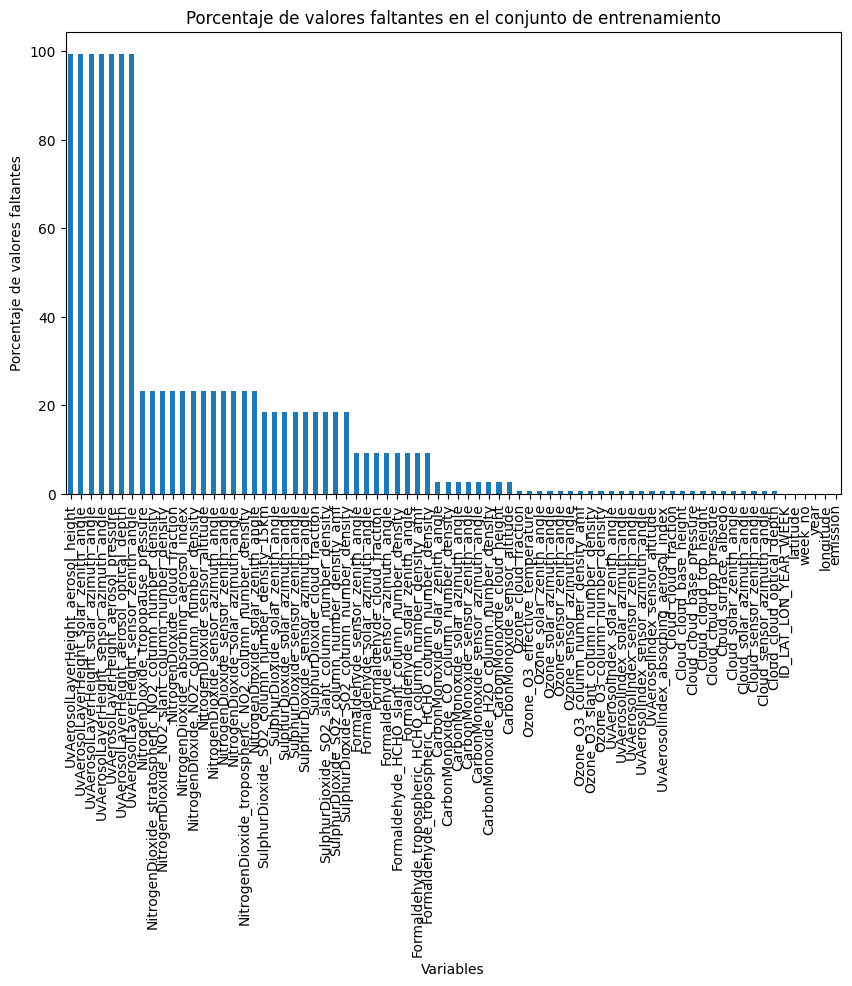

In [12]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de valores faltantes en train
missing_values_percentage = 100*train.isna().sum().sort_values(ascending = False) / train.shape[0]

# Crear la visualización
plt.figure(figsize=(10, 6))
missing_values_percentage.plot(kind='bar')
plt.title('Porcentaje de valores faltantes en el conjunto de entrenamiento')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores faltantes')
plt.show()


In [13]:
# VALORES FALTANTES EN EL TEST
100*test.isna().sum().sort_values(ascending = False) / test.shape[0]


UvAerosolLayerHeight_aerosol_pressure         91.405576
UvAerosolLayerHeight_aerosol_optical_depth    91.405576
UvAerosolLayerHeight_sensor_zenith_angle      91.405576
UvAerosolLayerHeight_sensor_azimuth_angle     91.405576
UvAerosolLayerHeight_aerosol_height           91.405576
                                                ...    
latitude                                       0.000000
week_no                                        0.000000
year                                           0.000000
longitude                                      0.000000
ID_LAT_LON_YEAR_WEEK                           0.000000
Length: 75, dtype: float64

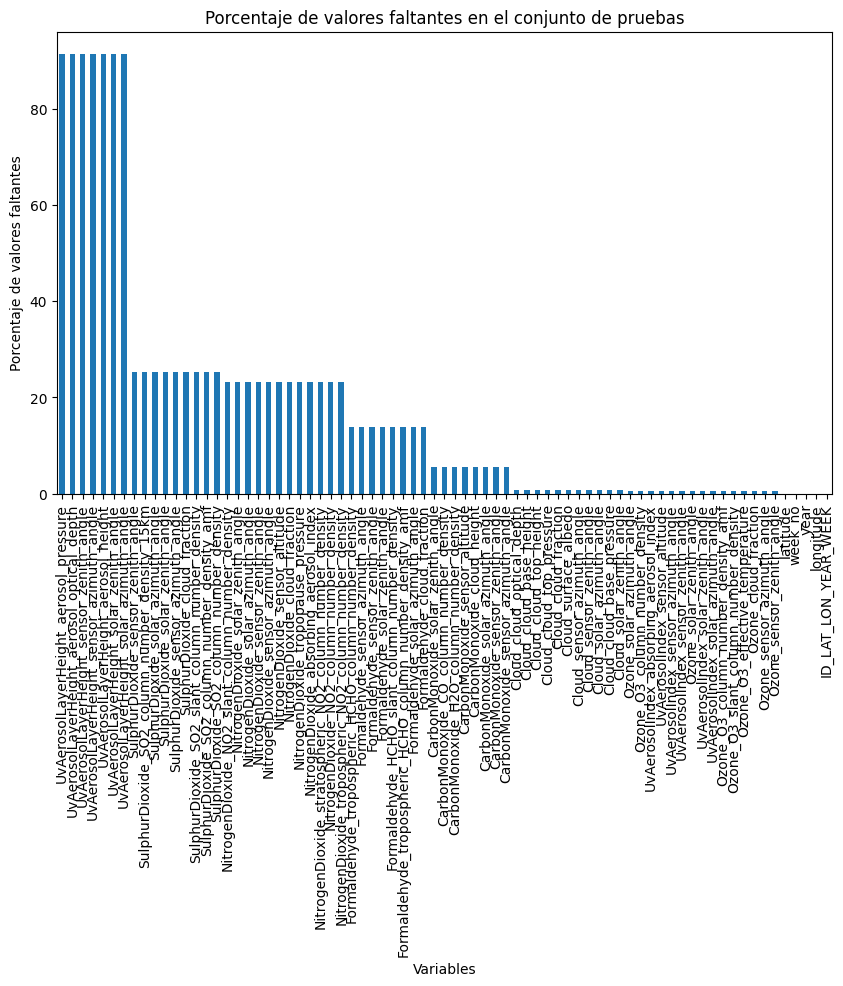

In [14]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de valores faltantes en test
missing_values_percentage_test = 100*test.isna().sum().sort_values(ascending = False) / test.shape[0]

# Crear la visualización
plt.figure(figsize=(10, 6))
missing_values_percentage_test.plot(kind='bar')
plt.title('Porcentaje de valores faltantes en el conjunto de pruebas')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores faltantes')
plt.show()


In [15]:
# Número de valores faltantes para cada año
train.isnull().groupby(train['year']).sum().sum(axis=1)

year
2019    309254
2020    333338
2021    347499
dtype: int64

In [16]:
def Drop_col(data):
    columns = ["UvAerosolLayerHeight_aerosol_height", "UvAerosolLayerHeight_aerosol_pressure", "UvAerosolLayerHeight_aerosol_optical_depth",
               "UvAerosolLayerHeight_sensor_zenith_angle", "UvAerosolLayerHeight_sensor_azimuth_angle", "UvAerosolLayerHeight_solar_azimuth_angle",
               "UvAerosolLayerHeight_solar_zenith_angle", "ID_LAT_LON_YEAR_WEEK"]

    for col in columns:
        data.drop(columns=col, axis=1, inplace=True)
    return data

train = Drop_col(train)
test = Drop_col(test)

#Eliminamos las anteriores columnas ya que cuentan con una cantidad muy grande de valores faltantes y no aportan a la predicción.

In [17]:
def Fill_data(data):
    for col in data.columns:
        data[col] = data[col].fillna(data[col].median())
    return data
train = Fill_data(train)
test = Fill_data(test)

#Para los valores faltantes de las demas columnas realizamos el llenado con la mediana.

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 7   SulphurDioxide_cloud_fraction                             79023 non-null  float64
 8   SulphurDioxide_s

In [ ]:
# Descripción estadística del conjunto de entrenamiento
train_description = train.describe()

# Visualización de la descripción estadística
print(train_description)


In [ ]:
# Conteo de datos almacenados
count_data = train_description.loc['count']

# Media aritmética
mean_data = train_description.loc['mean']

# Desviación estándar
std_data = train_description.loc['std']

# Visualizar los resultados
print("Conteo de datos:\n", count_data)
print("\nMedia aritmética:\n", mean_data)
print("\nDesviación estándar:\n", std_data)


In [ ]:
# Gráficos para el conteo de datos, media aritmética y desviación estándar
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Conteo de datos
sns.barplot(x=count_data.index, y=count_data.values, ax=axes[0])
axes[0].set_title('Conteo de Datos')
axes[0].set_ylabel('Cantidad')

# Media aritmética
sns.barplot(x=mean_data.index, y=mean_data.values, ax=axes[1])
axes[1].set_title('Media Aritmética')
axes[1].set_ylabel('Valor Medio')

# Desviación estándar
sns.barplot(x=std_data.index, y=std_data.values, ax=axes[2])
axes[2].set_title('Desviación Estándar')
axes[2].set_ylabel('Valor')

# Ajustes finales
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Estadísticas específicas para las emisiones
emission_stats = train['emission'].describe(percentiles=[.25, .5, .75])

# Visualización de las estadísticas
print("Estadísticas de las emisiones:")
print(emission_stats)

# Gráfico de caja para visualizar los percentiles
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['emission'])
plt.title('Distribución de las Emisiones')
plt.xlabel('Emisiones')
plt.show()


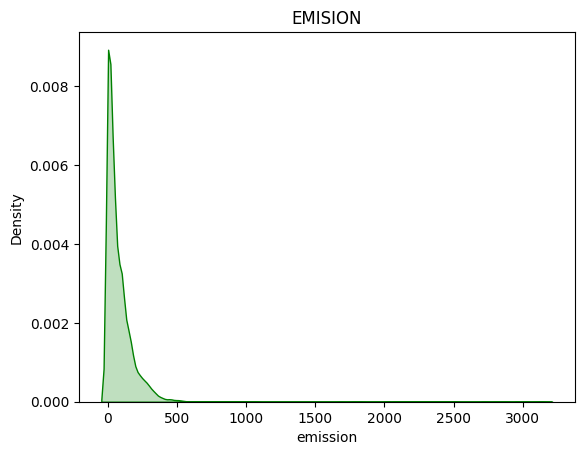

In [19]:
# MIRAMOS EL COMPORTAMIENTO DE LA VARIABLE DE INTERES EMISION
sns.kdeplot(data = train, x = 'emission', fill = True, color = 'green').set_title('EMISION');


#valores sesgados a la derecha

In [20]:
# Convierte la columna "year" en categórica
train['year'] = train['year'].astype('category')

# Verifica que "year" ahora es una variable categórica
print(train['year'].dtype)

print(train['year'])


#CONVERTIMOS LA VARIABLE YEAR EN CATEGORICA 1,2,3  RESPECTO A LOS AÑOS 2019,2020,2021

category
0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
79018    2021
79019    2021
79020    2021
79021    2021
79022    2021
Name: year, Length: 79023, dtype: category
Categories (3, int64): [2019, 2020, 2021]


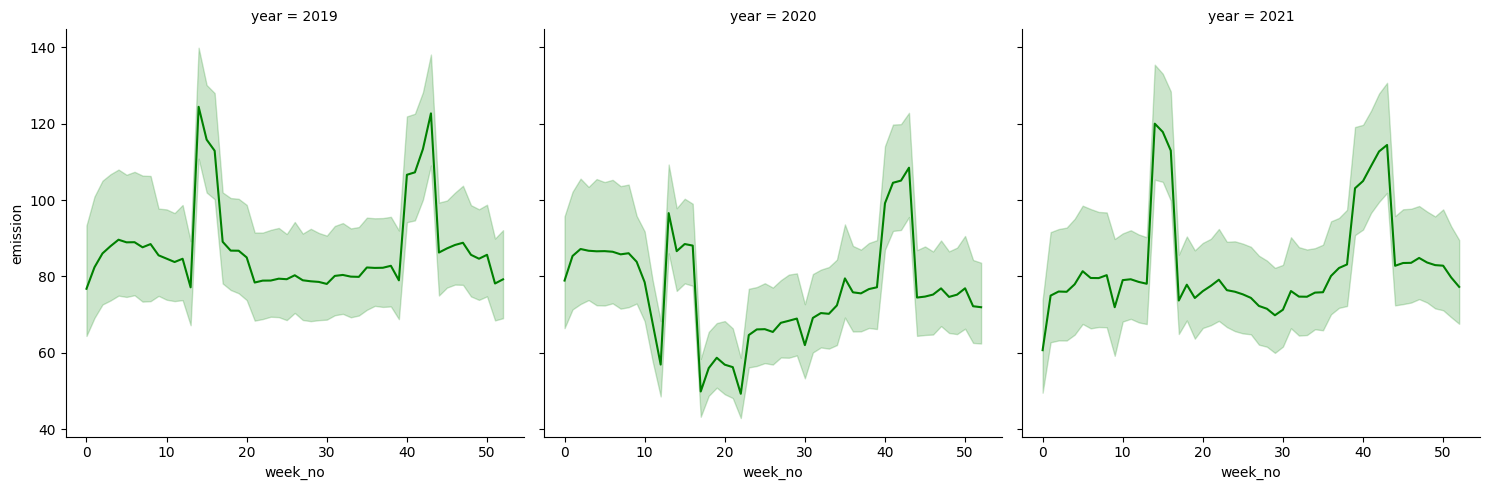

In [21]:
#visualizamos las emisiones promedio por semana del año.

sns.relplot(data = train, x = 'week_no', y = 'emission', col = 'year', kind = 'line', color = 'green');

#De lo anterior, vemos lo siguiente: En 2019, 2020 y 2021, las semanas 14, 15, 16, 41, 42 y 42 aproximadamente aumentan.
#Las emisiones en 2019 y 2021 son similares. Las emisiones en 2020 son diferentes a las de los otros dos años (probablemente debido a la pandemia del COVID).

<Axes: >

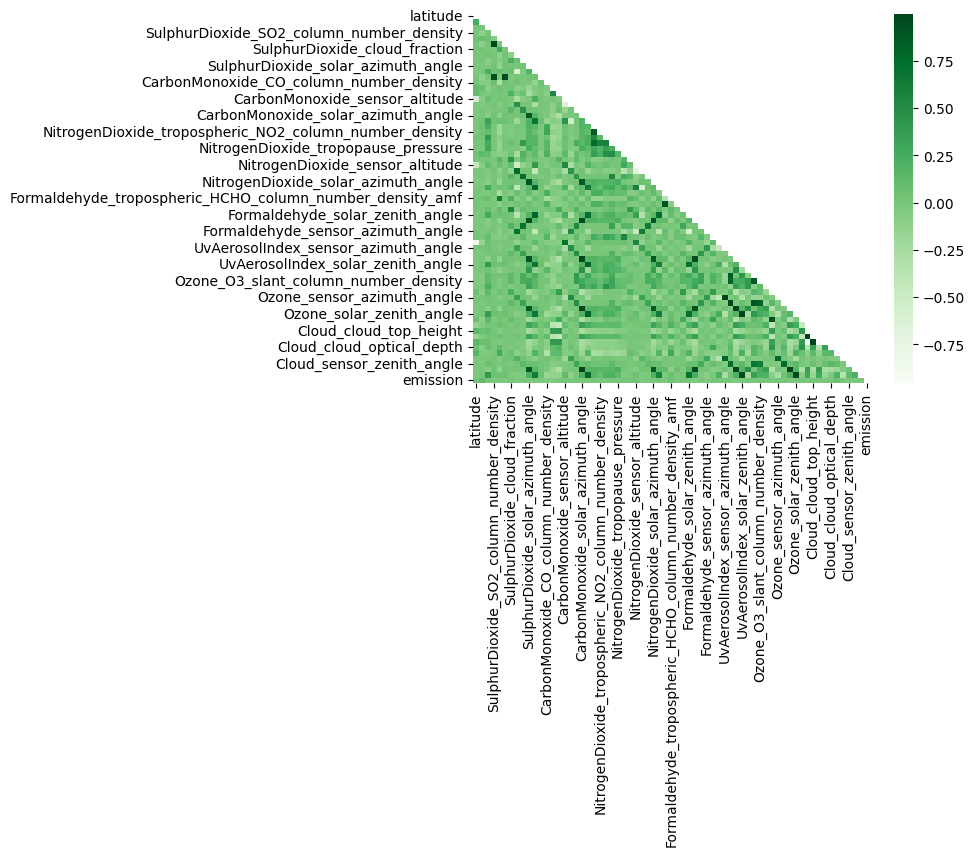

In [22]:
# VEMOS LA CORRELACION DE LAS VARIABLES

correlation = train.corr(numeric_only = True)
sns.heatmap(correlation, mask = np.triu(np.ones_like(correlation)), cmap = 'Greens')

In [23]:
# CORRELACION ENTRE LAS CARACTERISTICAS Y EMISIONES
correlation['emission'].sort_values(ascending = False).to_frame().style.background_gradient(cmap = 'PuBu')


#por lo que vemos muy pocas tienen un impacto en la variable emisiones

,emission
emission,1.000000
longitude,0.102746
Cloud_surface_albedo,0.046535
Formaldehyde_tropospheric_HCHO_column_number_density_amf,0.038047
NitrogenDioxide_sensor_altitude,0.023534
NitrogenDioxide_cloud_fraction,0.019793
NitrogenDioxide_absorbing_aerosol_index,0.018374
latitude,0.017851
Ozone_O3_column_number_density,0.013821
UvAerosolIndex_sensor_azimuth_angle,0.008287


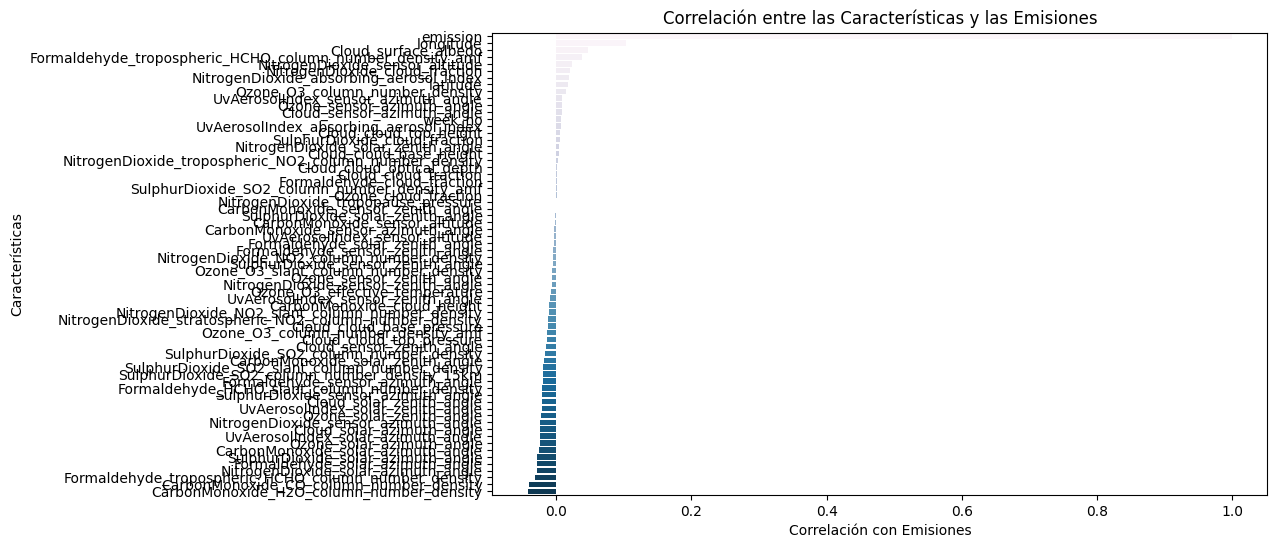

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las características con correlación con las emisiones
correlation_sorted = correlation['emission'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='PuBu')
plt.xlabel('Correlación con Emisiones')
plt.ylabel('Características')
plt.title('Correlación entre las Características y las Emisiones')
plt.show()




In [25]:
# Latitud y longitud

fig = px.scatter_mapbox(train[train['year'] == 2019],
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'emission',
                        animation_frame = 'week_no',
                        zoom = 6)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

#REALIZAMOS EL MAPA DE LAS EMISIONES CON LAS LOCALIZACIONES DADAS

*MODELADO*

In [26]:
#Primero comenzamos construyendo un enfoque sin aprendizaje automático para pronosticar las emisiones en función de la ubicación y el número de semana.

train['location'] = [str(train['latitude'][i]) + '_' + str(train['longitude'][i]) for i in range(0, train.shape[0])]
test['location'] = [str(test['latitude'][i]) + '_' + str(test['longitude'][i]) for i in range(0, test.shape[0])]

train['location'] = train['location'].astype('category')
test['location'] = test['location'].astype('category')

train_agg = pd.DataFrame(train.groupby(['location', 'week_no'])['emission'].mean()).reset_index()
train_agg.head()

,location,week_no,emission
0,-0.51_29.29,0,3.608051
1,-0.51_29.29,1,4.016319
2,-0.51_29.29,2,4.138755
3,-0.51_29.29,3,4.184737
4,-0.51_29.29,4,4.247569


In [27]:
train_nocovid = train[(train.year == 2019) |
                      ((train.year == 2020) & (train.week_no <= 8))  |
                      ((train.year == 2020) & (train.week_no >= 32)) |
                      (train.year == 2021)]
train_covid = train[((train.year == 2020) & (train.week_no > 8)) &
                    ((train.year == 2020) & (train.week_no < 32))]

assert train_nocovid.shape[0] + train_covid.shape[0] == train.shape[0]

In [28]:
average_nocovid = train_nocovid.groupby('week_no')['emission'].mean()
average_covid = train_covid.groupby('week_no')['emission'].mean()
ratio = average_nocovid/average_covid
train_covid_copy = train_covid.copy()
train_covid_copy['week_ratio'] = train_covid_copy['week_no'].map(ratio)
train_covid_copy['emission'] *= train_covid_copy['week_ratio'].copy()
# train_covid['week_ratio'] = train_covid['week_no'].map(ratio)
# train_covid['emission'] *= train_covid['week_ratio']
for index in train_covid_copy.index:
    train.loc[index,'emission'] = train_covid_copy.loc[index,'emission']

In [29]:
train_48_weeks = train[train['week_no'] <= 48]
cols = ['location', 'week_no']
X_train = train_48_weeks[cols]
y = train_48_weeks['emission']
X_test = test[cols]

In [30]:
!pip install flaml
!pip install ray[tune]==2.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 37.2 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.59.2
    Uninstalling grpcio-1.59.2:
      Successfully uninstalled grpcio-1.59.2


In [31]:
from flaml import AutoML

automl = AutoML()
automl_settings = {
    "time_budget": 200,
    "metric": 'rmse',
    "task": 'regression',
    "n_jobs": -1,
    "eval_method": 'cv'
}

automl.fit(
    X_train=X_train,
    y_train=y,
    **automl_settings)


# FLAML para automatizar el proceso de selección y ajuste de modelos de regresión en un conjunto de datos. Se configura un límite
#de tiempo máximo de 200 segundos, se define el uso del RMSE como métrica de evaluación, se especifica que es una tarea de regresión,
# se utilizan todos los núcleos de la CPU disponibles para el proceso y se emplea la validación cruzada para evaluar los modelos.

[flaml.automl.logger: 11-14 18:05:43] {1679} INFO - task = regression
[flaml.automl.logger: 11-14 18:05:43] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 11-14 18:05:43] {1788} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 11-14 18:05:43] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 11-14 18:05:43] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-14 18:05:43] {2344} INFO - Estimated sufficient time budget=3940s. Estimated necessary time budget=28s.
[flaml.automl.logger: 11-14 18:05:43] {2391} INFO -  at 0.4s,	estimator lgbm's best error=113.3260,	best estimator lgbm's best error=113.3260
[flaml.automl.logger: 11-14 18:05:43] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-14 18:05:44] {2391} INFO -  at 1.0s,	estimator lgbm's best error=113.3260,	best estimator lgbm's best error=113.3260
[flaml.automl.logger: 11-14 18:05:44] {2218}

In [32]:
print(automl.fit)

<bound method AutoML.fit of AutoML(append_log=False, auto_augment=True, custom_hp={},
       cv_score_agg_func=None, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', fit_kwargs_by_estimator={},
       force_cancel=False, free_mem_ratio=0, hpo_method='auto',
       keep_search_state=False, learner_selector='sample', log_file_name='',
       log_training_metric=False, log_type='better', max_iter=None,
       mem_thres=4294967296, metric='auto', metric_constraints=[],
       min_sample_size=10000, mlflow_logging=True, model_history=False,
       n_concurrent_trials=1, n_jobs=-1, n_splits=5, pred_time_limit=inf,
       preserve_checkpoint=True, retrain_full=True, ...)>




---



---



---



